<a href="https://colab.research.google.com/github/YuLim2/NOTIFAM/blob/master/Priceview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 월별 농축수산물 도매가격 정보
  - 1996년 ~ 2021년 8월

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 향후 버전 업에 대한 경고 메시지 출력 안하기 
import warnings

warnings.filterwarnings(action='ignore') 

## 1) 데이터 수집

In [ ]:
import numpy as np
import pandas as pd 
from google.colab import drive
import matplotlib.pyplot as plt

#drive.mount('/content/drive')

data_df = pd.read_csv('WholesalePrice_20210831.csv', header=0, encoding='cp949')

## 2) 데이터 준비 및 탐색

In [ ]:
print(' 데이터셋 크기 : ', data_df.shape)

data_df.tail()

 데이터셋 크기 :  (42339, 8)


,연도,월,품목명,품종명,평균가격,등급명,유통단계별무게,유통단계별단위명
42334,2021,8,건오징어,건오징어,82600.0,중품,20.0,마리
42335,2021,8,김,마른김,6140.0,중품,1.0,속
42336,2021,8,건미역,건미역,11920.0,상품,1.0,kg
42337,2021,8,전복,전복,34660.0,중품,1.0,kg
42338,2021,8,새우,흰다리(수입),25260.0,중품,2.0,kg


#### - 분석하지 않을 변수 제외하기

In [ ]:
data_df_list = data_df['품목명']

In [ ]:
print(' 데이터세트 크기 : ', data_df.shape)

data_df_list.unique()

 데이터세트 크기 :  (42339, 8)


array(['쌀', '찹쌀', '콩', '팥', '녹두', '고구마', '감자', '배추', '양배추', '시금치', '상추',
       '오이', '호박', '무', '당근', '건고추', '풋고추', '붉은고추', '피마늘', '양파', '파',
       '생강', '미나리', '참깨', '들깨', '땅콩', '사과', '배', '감귤', '단감', '바나나', '참다래',
       '파인애플', '고등어', '갈치', '명태', '물오징어', '건멸치', '북어', '건오징어', '김', '건미역',
       '굴', '딸기', '참외', '토마토', '수박', '복숭아', '포도', '깻잎', '오렌지', '방울토마토',
       '피망', '느타리버섯', '메밀', '깐마늘(국산)', '깐마늘(수입)', '팽이버섯', '수입조기', '파프리카',
       '멜론', '새송이버섯', '얼갈이배추', '열무', '레몬', '체리', '망고', '전복', '새우'],
      dtype=object)

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42339 entries, 0 to 42338
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        42339 non-null  int64  
 1   월         42339 non-null  int64  
 2   품목명       42339 non-null  object 
 3   품종명       42339 non-null  object 
 4   평균가격      42339 non-null  float64
 5   등급명       42339 non-null  object 
 6   유통단계별무게   42339 non-null  float64
 7   유통단계별단위명  42339 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 2.6+ MB


In [ ]:
tomato = data_df.loc[data_df['품목명'] == '토마토']
tomato = tomato.loc[tomato['등급명'] == '상품']
tomato.tail()

,연도,월,품목명,품종명,평균가격,등급명,유통단계별무게,유통단계별단위명
41579,2021,4,토마토,토마토,34080.909,상품,10.0,kg
41734,2021,5,토마토,토마토,22544.444,상품,10.0,kg
41886,2021,6,토마토,토마토,19586.364,상품,10.0,kg
42044,2021,7,토마토,토마토,23439.091,상품,10.0,kg
42219,2021,8,토마토,토마토,18250.000,상품,10.0,kg


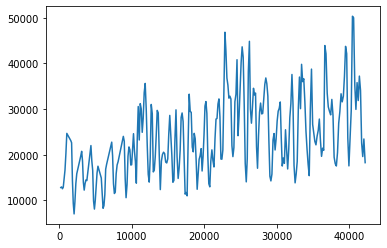

In [ ]:
# tomato['월'] = pd.to_datetime(tomato['월'])
# tomato.index = tomato['월']
# tomato.set_index('월', inplace=True)
Y = tomato['평균가격']
X = tomato.drop(['품목명', '품종명', '평균가격', '등급명', '유통단계별무게', '유통단계별단위명'], axis=1, inplace=False)
plt.plot(Y)
plt.show()

In [ ]:
print(X)

         연도  월
236    1996  3
346    1996  4
461    1996  5
574    1996  6
691    1996  7
...     ... ..
41579  2021  4
41734  2021  5
41886  2021  6
42044  2021  7
42219  2021  8

[281 rows x 2 columns]


## 3) 분석 모델 구축

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# X, Y 분할하기

# Y = tomato['평균가격']
# X = tomato.drop(['평균가격', '품목명', '품종명', '등급명', '유통단계별무게', '유통단계별단위명'], axis=1, inplace=False)

In [ ]:
# 훈련용 데이터와 평가용 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# 선형회귀분석 : 모델 생성
lr = LinearRegression()

In [ ]:
# 선형회귀분석 : 모델 훈련
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# 선형회귀분석 : 평가 데이터에 대한 예측 수행 -> 예측 결과 Y_predict 구하기
Y_predict = lr.predict(X_test)

## 4) 결과 분석 및 시각화

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('R^2(Variance score) : {0:.3f}'.format(r2_score(Y_test, Y_predict)))

MSE : 50832782.587, RMSE : 7129.711
R^2(Variance score) : 0.254
